In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(123)

from keras.datasets import mnist
from keras.models import Sequential

from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils import np_utils

Using Theano backend.


Can not use cuDNN on context None: cannot compile with cuDNN. We got this error:
b'In file included from /tmp/try_flags_raeojbqy.c:4:0:\n/usr/include/cudnn.h:63:26: fatal error: driver_types.h: No such file or directory\ncompilation terminated.\n'
Mapped name None to device cuda0: Tesla K80 (0000:00:04.0)


In [5]:
batch_size = 128
nb_classes = 10 # 10 Digits from 0 to 9

# Image dimensions
img_rows, img_cols = 28, 28

# Shuffle data and split between train and test
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape data
X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255
print("X_train shape = ", X_train.shape)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")

# Convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)
print("Example label:", y_train[0])
print("One hot encoding: {}".format(Y_train[0, :]))

X_train shape =  (60000, 1, 28, 28)
60000 train samples
10000 test samples
Example label: 5
One hot encoding: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


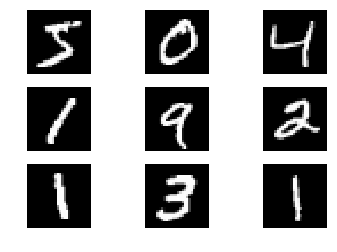

In [6]:
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i, 0], cmap='gray')
    plt.axis("off")

In [7]:
model = Sequential()

# Convolution2D(number_filters, row_size, column_size, input_shape=(number_channels, img_row, img_col))

model.add(Convolution2D(6, 5, 5, input_shape=(1, img_rows, img_cols), border_mode='same'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(16, 5, 5, border_mode='same'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(120, 5, 5))
model.add(Activation("relu"))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(84, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


/home/sergiy/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(6, (5, 5), padding="same", input_shape=(1, 28, 28...)`


/home/sergiy/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (5, 5), padding="same")`


/home/sergiy/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(120, (5, 5))`


In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=["accuracy"])

In [11]:
nb_epoch = 2

model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

score = model.evaluate(X_test, Y_test, verbose=0)

print("Test score:", score[0])
print("Test accuracy:", score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
  128/60000 [..............................] - ETA: 9s - loss: 0.0227 - acc: 0.9922

  384/60000 [..............................] - ETA: 18s - loss: 0.0419 - acc: 0.9870

  640/60000 [..............................] - ETA: 19s - loss: 0.0435 - acc: 0.9828

  896/60000 [..............................] - ETA: 20s - loss: 0.0405 - acc: 0.9833

 1152/60000 [..............................] - ETA: 20s - loss: 0.0426 - acc: 0.9818

 1408/60000 [..............................] - ETA: 21s - loss: 0.0395 - acc: 0.9844

 1664/60000 [..............................] - ETA: 21s - loss: 0.0388 - acc: 0.9850

 1920/60000 [..............................] - ETA: 21s - loss: 0.0393 - acc: 0.9854

 2176/60000 [>.............................] - ETA: 21s - loss: 0.0381 - acc: 0.9862

 2432/60000 [>.............................] - ETA: 21s - loss: 0.0385 - acc: 0.9864

 2688/60000 [>.............................] - ETA: 21s - loss: 0.0389 - acc: 0.9866

 2944/60000 [>.............................] - ETA: 21s - loss: 0.0390 - acc: 0.9861

 3200/60000 [>.............................] - ETA: 21s - loss: 0.0398 - acc: 0.9859

 3456/60000 [>.............................] - ETA: 21s - loss: 0.0411 - acc: 0.9858

 3712/60000 [>.............................] - ETA: 21s - loss: 0.0393 - acc: 0.9865

 3968/60000 [>.............................] - ETA: 20s - loss: 0.0410 - acc: 0.9869

 4224/60000 [=>............................] - ETA: 20s - loss: 0.0410 - acc: 0.9870

 4480/60000 [=>............................] - ETA: 20s - loss: 0.0407 - acc: 0.9873

 4736/60000 [=>............................] - ETA: 20s - loss: 0.0407 - acc: 0.9873

 4992/60000 [=>............................] - ETA: 20s - loss: 0.0427 - acc: 0.9872

 5248/60000 [=>............................] - ETA: 20s - loss: 0.0423 - acc: 0.9870

 5504/60000 [=>............................] - ETA: 20s - loss: 0.0423 - acc: 0.9869

 5760/60000 [=>............................] - ETA: 20s - loss: 0.0415 - acc: 0.9873

 6016/60000 [==>...........................] - ETA: 20s - loss: 0.0427 - acc: 0.9872

 6272/60000 [==>...........................] - ETA: 20s - loss: 0.0425 - acc: 0.9871

 6528/60000 [==>...........................] - ETA: 20s - loss: 0.0432 - acc: 0.9870

 6784/60000 [==>...........................] - ETA: 20s - loss: 0.0419 - acc: 0.9873

 7040/60000 [==>...........................] - ETA: 19s - loss: 0.0420 - acc: 0.9872

 7296/60000 [==>...........................] - ETA: 19s - loss: 0.0420 - acc: 0.9874

 7552/60000 [==>...........................] - ETA: 19s - loss: 0.0425 - acc: 0.9869

 7808/60000 [==>...........................] - ETA: 19s - loss: 0.0421 - acc: 0.9868

 8064/60000 [===>..........................] - ETA: 19s - loss: 0.0414 - acc: 0.9869

 8320/60000 [===>..........................] - ETA: 19s - loss: 0.0417 - acc: 0.9865

 8576/60000 [===>..........................] - ETA: 19s - loss: 0.0410 - acc: 0.9868

 8832/60000 [===>..........................] - ETA: 19s - loss: 0.0401 - acc: 0.9871

 9088/60000 [===>..........................] - ETA: 19s - loss: 0.0416 - acc: 0.9866

 9344/60000 [===>..........................] - ETA: 19s - loss: 0.0413 - acc: 0.9867

 9600/60000 [===>..........................] - ETA: 19s - loss: 0.0413 - acc: 0.9865

 9856/60000 [===>..........................] - ETA: 18s - loss: 0.0417 - acc: 0.9865

10112/60000 [====>.........................] - ETA: 18s - loss: 0.0425 - acc: 0.9865

10368/60000 [====>.........................] - ETA: 18s - loss: 0.0420 - acc: 0.9866

10624/60000 [====>.........................] - ETA: 18s - loss: 0.0425 - acc: 0.9866

10880/60000 [====>.........................] - ETA: 18s - loss: 0.0436 - acc: 0.9867

11136/60000 [====>.........................] - ETA: 18s - loss: 0.0433 - acc: 0.9866

11392/60000 [====>.........................] - ETA: 18s - loss: 0.0431 - acc: 0.9867

11648/60000 [====>.........................] - ETA: 18s - loss: 0.0435 - acc: 0.9866

11904/60000 [====>.........................] - ETA: 18s - loss: 0.0440 - acc: 0.9863

12160/60000 [=====>........................] - ETA: 18s - loss: 0.0438 - acc: 0.9864

12416/60000 [=====>........................] - ETA: 18s - loss: 0.0443 - acc: 0.9865

12672/60000 [=====>........................] - ETA: 17s - loss: 0.0441 - acc: 0.9867

12928/60000 [=====>........................] - ETA: 17s - loss: 0.0442 - acc: 0.9867

13184/60000 [=====>........................] - ETA: 17s - loss: 0.0451 - acc: 0.9865

13440/60000 [=====>........................] - ETA: 17s - loss: 0.0452 - acc: 0.9866

13696/60000 [=====>........................] - ETA: 17s - loss: 0.0449 - acc: 0.9867

13952/60000 [=====>........................] - ETA: 17s - loss: 0.0444 - acc: 0.9868

14208/60000 [======>.......................] - ETA: 17s - loss: 0.0444 - acc: 0.9866

14464/60000 [======>.......................] - ETA: 17s - loss: 0.0444 - acc: 0.9867

14720/60000 [======>.......................] - ETA: 17s - loss: 0.0440 - acc: 0.9868

14976/60000 [======>.......................] - ETA: 17s - loss: 0.0448 - acc: 0.9866

15232/60000 [======>.......................] - ETA: 16s - loss: 0.0446 - acc: 0.9866

15488/60000 [======>.......................] - ETA: 16s - loss: 0.0457 - acc: 0.9864

15744/60000 [======>.......................] - ETA: 16s - loss: 0.0454 - acc: 0.9864

16000/60000 [=======>......................] - ETA: 16s - loss: 0.0458 - acc: 0.9865

16256/60000 [=======>......................] - ETA: 16s - loss: 0.0453 - acc: 0.9866

16512/60000 [=======>......................] - ETA: 16s - loss: 0.0453 - acc: 0.9866

16768/60000 [=======>......................] - ETA: 16s - loss: 0.0453 - acc: 0.9866

17024/60000 [=======>......................] - ETA: 16s - loss: 0.0451 - acc: 0.9866

17280/60000 [=======>......................] - ETA: 16s - loss: 0.0450 - acc: 0.9867

17536/60000 [=======>......................] - ETA: 16s - loss: 0.0451 - acc: 0.9868

17792/60000 [=======>......................] - ETA: 16s - loss: 0.0460 - acc: 0.9866

18048/60000 [========>.....................] - ETA: 15s - loss: 0.0455 - acc: 0.9868

18304/60000 [========>.....................] - ETA: 15s - loss: 0.0455 - acc: 0.9869

18560/60000 [========>.....................] - ETA: 15s - loss: 0.0450 - acc: 0.9870

18816/60000 [========>.....................] - ETA: 15s - loss: 0.0451 - acc: 0.9870

19072/60000 [========>.....................] - ETA: 15s - loss: 0.0455 - acc: 0.9869

19328/60000 [========>.....................] - ETA: 15s - loss: 0.0456 - acc: 0.9868

19584/60000 [========>.....................] - ETA: 15s - loss: 0.0455 - acc: 0.9868

19840/60000 [========>.....................] - ETA: 15s - loss: 0.0454 - acc: 0.9868

20096/60000 [=========>....................] - ETA: 15s - loss: 0.0452 - acc: 0.9868

20352/60000 [=========>....................] - ETA: 15s - loss: 0.0450 - acc: 0.9869

20608/60000 [=========>....................] - ETA: 14s - loss: 0.0457 - acc: 0.9867

20864/60000 [=========>....................] - ETA: 14s - loss: 0.0457 - acc: 0.9867

21120/60000 [=========>....................] - ETA: 14s - loss: 0.0456 - acc: 0.9867

21376/60000 [=========>....................] - ETA: 14s - loss: 0.0456 - acc: 0.9867

21632/60000 [=========>....................] - ETA: 14s - loss: 0.0455 - acc: 0.9867

21888/60000 [=========>....................] - ETA: 14s - loss: 0.0451 - acc: 0.9868

22144/60000 [==========>...................] - ETA: 14s - loss: 0.0453 - acc: 0.9868

22400/60000 [==========>...................] - ETA: 14s - loss: 0.0455 - acc: 0.9867

22656/60000 [==========>...................] - ETA: 14s - loss: 0.0455 - acc: 0.9868

22912/60000 [==========>...................] - ETA: 14s - loss: 0.0453 - acc: 0.9868

23168/60000 [==========>...................] - ETA: 13s - loss: 0.0451 - acc: 0.9869

23424/60000 [==========>...................] - ETA: 13s - loss: 0.0449 - acc: 0.9870

23680/60000 [==========>...................] - ETA: 13s - loss: 0.0449 - acc: 0.9870

23936/60000 [==========>...................] - ETA: 13s - loss: 0.0446 - acc: 0.9870

24192/60000 [===========>..................] - ETA: 13s - loss: 0.0451 - acc: 0.9869

24448/60000 [===========>..................] - ETA: 13s - loss: 0.0448 - acc: 0.9870

24704/60000 [===========>..................] - ETA: 13s - loss: 0.0449 - acc: 0.9870

24960/60000 [===========>..................] - ETA: 13s - loss: 0.0447 - acc: 0.9871

25216/60000 [===========>..................] - ETA: 13s - loss: 0.0445 - acc: 0.9871

25472/60000 [===========>..................] - ETA: 13s - loss: 0.0444 - acc: 0.9870

25728/60000 [===========>..................] - ETA: 13s - loss: 0.0446 - acc: 0.9869

25984/60000 [===========>..................] - ETA: 12s - loss: 0.0455 - acc: 0.9868

26240/60000 [============>.................] - ETA: 12s - loss: 0.0452 - acc: 0.9869

26496/60000 [============>.................] - ETA: 12s - loss: 0.0454 - acc: 0.9869

26752/60000 [============>.................] - ETA: 12s - loss: 0.0454 - acc: 0.9869

27008/60000 [============>.................] - ETA: 12s - loss: 0.0456 - acc: 0.9868

27264/60000 [============>.................] - ETA: 12s - loss: 0.0458 - acc: 0.9868

27520/60000 [============>.................] - ETA: 12s - loss: 0.0456 - acc: 0.9869

27776/60000 [============>.................] - ETA: 12s - loss: 0.0460 - acc: 0.9868

28032/60000 [=============>................] - ETA: 12s - loss: 0.0462 - acc: 0.9867

28288/60000 [=============>................] - ETA: 12s - loss: 0.0463 - acc: 0.9867

28544/60000 [=============>................] - ETA: 11s - loss: 0.0461 - acc: 0.9868

28800/60000 [=============>................] - ETA: 11s - loss: 0.0460 - acc: 0.9867

29056/60000 [=============>................] - ETA: 11s - loss: 0.0463 - acc: 0.9867

29312/60000 [=============>................] - ETA: 11s - loss: 0.0462 - acc: 0.9867

29568/60000 [=============>................] - ETA: 11s - loss: 0.0462 - acc: 0.9867

29824/60000 [=============>................] - ETA: 11s - loss: 0.0461 - acc: 0.9867

30080/60000 [==============>...............] - ETA: 11s - loss: 0.0461 - acc: 0.9867

30336/60000 [==============>...............] - ETA: 11s - loss: 0.0464 - acc: 0.9866

30592/60000 [==============>...............] - ETA: 11s - loss: 0.0462 - acc: 0.9867

30848/60000 [==============>...............] - ETA: 11s - loss: 0.0462 - acc: 0.9865

31104/60000 [==============>...............] - ETA: 10s - loss: 0.0464 - acc: 0.9865

31360/60000 [==============>...............] - ETA: 10s - loss: 0.0466 - acc: 0.9863

31616/60000 [==============>...............] - ETA: 10s - loss: 0.0466 - acc: 0.9863

31872/60000 [==============>...............] - ETA: 10s - loss: 0.0473 - acc: 0.9862

32128/60000 [===============>..............] - ETA: 10s - loss: 0.0472 - acc: 0.9862

32384/60000 [===============>..............] - ETA: 10s - loss: 0.0473 - acc: 0.9861

32640/60000 [===============>..............] - ETA: 10s - loss: 0.0472 - acc: 0.9862

32896/60000 [===============>..............] - ETA: 10s - loss: 0.0470 - acc: 0.9862

33152/60000 [===============>..............] - ETA: 10s - loss: 0.0470 - acc: 0.9862

33408/60000 [===============>..............] - ETA: 10s - loss: 0.0468 - acc: 0.9863

33664/60000 [===============>..............] - ETA: 10s - loss: 0.0474 - acc: 0.9861

33920/60000 [===============>..............] - ETA: 9s - loss: 0.0475 - acc: 0.9861 

34176/60000 [================>.............] - ETA: 9s - loss: 0.0473 - acc: 0.9861

34432/60000 [================>.............] - ETA: 9s - loss: 0.0470 - acc: 0.9862

34688/60000 [================>.............] - ETA: 9s - loss: 0.0468 - acc: 0.9863

34944/60000 [================>.............] - ETA: 9s - loss: 0.0466 - acc: 0.9863

35200/60000 [================>.............] - ETA: 9s - loss: 0.0468 - acc: 0.9863

35456/60000 [================>.............] - ETA: 9s - loss: 0.0471 - acc: 0.9862

35712/60000 [================>.............] - ETA: 9s - loss: 0.0471 - acc: 0.9863

35968/60000 [================>.............] - ETA: 9s - loss: 0.0470 - acc: 0.9863

36224/60000 [=================>............] - ETA: 9s - loss: 0.0474 - acc: 0.9863

36480/60000 [=================>............] - ETA: 8s - loss: 0.0472 - acc: 0.9863

36736/60000 [=================>............] - ETA: 8s - loss: 0.0472 - acc: 0.9863

36992/60000 [=================>............] - ETA: 8s - loss: 0.0470 - acc: 0.9864

37248/60000 [=================>............] - ETA: 8s - loss: 0.0469 - acc: 0.9864

37504/60000 [=================>............] - ETA: 8s - loss: 0.0468 - acc: 0.9864

37760/60000 [=================>............] - ETA: 8s - loss: 0.0474 - acc: 0.9864

38016/60000 [==================>...........] - ETA: 8s - loss: 0.0473 - acc: 0.9863

38272/60000 [==================>...........] - ETA: 8s - loss: 0.0471 - acc: 0.9864

38528/60000 [==================>...........] - ETA: 8s - loss: 0.0470 - acc: 0.9864

38784/60000 [==================>...........] - ETA: 8s - loss: 0.0470 - acc: 0.9865

39040/60000 [==================>...........] - ETA: 7s - loss: 0.0470 - acc: 0.9864

39296/60000 [==================>...........] - ETA: 7s - loss: 0.0468 - acc: 0.9865

39552/60000 [==================>...........] - ETA: 7s - loss: 0.0466 - acc: 0.9866

39808/60000 [==================>...........] - ETA: 7s - loss: 0.0466 - acc: 0.9866

40064/60000 [===================>..........] - ETA: 7s - loss: 0.0464 - acc: 0.9866

40320/60000 [===================>..........] - ETA: 7s - loss: 0.0463 - acc: 0.9867

40576/60000 [===================>..........] - ETA: 7s - loss: 0.0463 - acc: 0.9866

40832/60000 [===================>..........] - ETA: 7s - loss: 0.0461 - acc: 0.9867

41088/60000 [===================>..........] - ETA: 7s - loss: 0.0459 - acc: 0.9868

41344/60000 [===================>..........] - ETA: 7s - loss: 0.0457 - acc: 0.9868

41600/60000 [===================>..........] - ETA: 7s - loss: 0.0456 - acc: 0.9869

41856/60000 [===================>..........] - ETA: 6s - loss: 0.0454 - acc: 0.9869

42112/60000 [====================>.........] - ETA: 6s - loss: 0.0455 - acc: 0.9868

42368/60000 [====================>.........] - ETA: 6s - loss: 0.0455 - acc: 0.9868

42624/60000 [====================>.........] - ETA: 6s - loss: 0.0454 - acc: 0.9869

42880/60000 [====================>.........] - ETA: 6s - loss: 0.0452 - acc: 0.9870

43136/60000 [====================>.........] - ETA: 6s - loss: 0.0452 - acc: 0.9870

43392/60000 [====================>.........] - ETA: 6s - loss: 0.0452 - acc: 0.9870

43648/60000 [====================>.........] - ETA: 6s - loss: 0.0452 - acc: 0.9870

43904/60000 [====================>.........] - ETA: 6s - loss: 0.0453 - acc: 0.9869

44160/60000 [=====================>........] - ETA: 6s - loss: 0.0451 - acc: 0.9870

44416/60000 [=====================>........] - ETA: 5s - loss: 0.0453 - acc: 0.9870

44672/60000 [=====================>........] - ETA: 5s - loss: 0.0455 - acc: 0.9870

44928/60000 [=====================>........] - ETA: 5s - loss: 0.0453 - acc: 0.9870

45184/60000 [=====================>........] - ETA: 5s - loss: 0.0454 - acc: 0.9870

45440/60000 [=====================>........] - ETA: 5s - loss: 0.0456 - acc: 0.9869

45696/60000 [=====================>........] - ETA: 5s - loss: 0.0458 - acc: 0.9869

45952/60000 [=====================>........] - ETA: 5s - loss: 0.0459 - acc: 0.9869

46208/60000 [======================>.......] - ETA: 5s - loss: 0.0458 - acc: 0.9869

46464/60000 [======================>.......] - ETA: 5s - loss: 0.0458 - acc: 0.9869

46720/60000 [======================>.......] - ETA: 5s - loss: 0.0459 - acc: 0.9868

46976/60000 [======================>.......] - ETA: 4s - loss: 0.0457 - acc: 0.9868

47232/60000 [======================>.......] - ETA: 4s - loss: 0.0458 - acc: 0.9868

47488/60000 [======================>.......] - ETA: 4s - loss: 0.0458 - acc: 0.9868

47744/60000 [======================>.......] - ETA: 4s - loss: 0.0458 - acc: 0.9868

48000/60000 [=======================>......] - ETA: 4s - loss: 0.0461 - acc: 0.9868

48256/60000 [=======================>......] - ETA: 4s - loss: 0.0462 - acc: 0.9868

48512/60000 [=======================>......] - ETA: 4s - loss: 0.0461 - acc: 0.9868

48768/60000 [=======================>......] - ETA: 4s - loss: 0.0462 - acc: 0.9868

49024/60000 [=======================>......] - ETA: 4s - loss: 0.0463 - acc: 0.9868

49280/60000 [=======================>......] - ETA: 4s - loss: 0.0463 - acc: 0.9868

49536/60000 [=======================>......] - ETA: 3s - loss: 0.0465 - acc: 0.9867

49792/60000 [=======================>......] - ETA: 3s - loss: 0.0466 - acc: 0.9867

50048/60000 [========================>.....] - ETA: 3s - loss: 0.0466 - acc: 0.9867

50304/60000 [========================>.....] - ETA: 3s - loss: 0.0465 - acc: 0.9867

50560/60000 [========================>.....] - ETA: 3s - loss: 0.0466 - acc: 0.9867

50816/60000 [========================>.....] - ETA: 3s - loss: 0.0465 - acc: 0.9867

51072/60000 [========================>.....] - ETA: 3s - loss: 0.0465 - acc: 0.9867

51328/60000 [========================>.....] - ETA: 3s - loss: 0.0465 - acc: 0.9867

51584/60000 [========================>.....] - ETA: 3s - loss: 0.0464 - acc: 0.9867

51840/60000 [========================>.....] - ETA: 3s - loss: 0.0463 - acc: 0.9867

52096/60000 [=========================>....] - ETA: 3s - loss: 0.0463 - acc: 0.9867

52352/60000 [=========================>....] - ETA: 2s - loss: 0.0465 - acc: 0.9867

52608/60000 [=========================>....] - ETA: 2s - loss: 0.0465 - acc: 0.9867

52864/60000 [=========================>....] - ETA: 2s - loss: 0.0464 - acc: 0.9867

53120/60000 [=========================>....] - ETA: 2s - loss: 0.0463 - acc: 0.9868

53376/60000 [=========================>....] - ETA: 2s - loss: 0.0462 - acc: 0.9868

53632/60000 [=========================>....] - ETA: 2s - loss: 0.0461 - acc: 0.9868

53888/60000 [=========================>....] - ETA: 2s - loss: 0.0461 - acc: 0.9868

54144/60000 [==========================>...] - ETA: 2s - loss: 0.0460 - acc: 0.9868

54400/60000 [==========================>...] - ETA: 2s - loss: 0.0460 - acc: 0.9868

54656/60000 [==========================>...] - ETA: 2s - loss: 0.0459 - acc: 0.9869

54912/60000 [==========================>...] - ETA: 1s - loss: 0.0459 - acc: 0.9869

55168/60000 [==========================>...] - ETA: 1s - loss: 0.0461 - acc: 0.9868

55424/60000 [==========================>...] - ETA: 1s - loss: 0.0461 - acc: 0.9868

55680/60000 [==========================>...] - ETA: 1s - loss: 0.0463 - acc: 0.9867

55936/60000 [==========================>...] - ETA: 1s - loss: 0.0462 - acc: 0.9868

56192/60000 [===========================>..] - ETA: 1s - loss: 0.0463 - acc: 0.9867

56448/60000 [===========================>..] - ETA: 1s - loss: 0.0461 - acc: 0.9867

56704/60000 [===========================>..] - ETA: 1s - loss: 0.0461 - acc: 0.9867

56960/60000 [===========================>..] - ETA: 1s - loss: 0.0462 - acc: 0.9867

57216/60000 [===========================>..] - ETA: 1s - loss: 0.0461 - acc: 0.9868

57472/60000 [===========================>..] - ETA: 0s - loss: 0.0460 - acc: 0.9868

57728/60000 [===========================>..] - ETA: 0s - loss: 0.0465 - acc: 0.9868

57984/60000 [===========================>..] - ETA: 0s - loss: 0.0465 - acc: 0.9868

58240/60000 [============================>.] - ETA: 0s - loss: 0.0465 - acc: 0.9868

58496/60000 [============================>.] - ETA: 0s - loss: 0.0465 - acc: 0.9868

58752/60000 [============================>.] - ETA: 0s - loss: 0.0466 - acc: 0.9868

59008/60000 [============================>.] - ETA: 0s - loss: 0.0465 - acc: 0.9868

59264/60000 [============================>.] - ETA: 0s - loss: 0.0465 - acc: 0.9868

59520/60000 [============================>.] - ETA: 0s - loss: 0.0465 - acc: 0.9867

59776/60000 [============================>.] - ETA: 0s - loss: 0.0466 - acc: 0.9867

60000/60000 [==============================] - 24s 397us/step - loss: 0.0465 - acc: 0.9867 - val_loss: 0.0266 - val_acc: 0.9916


Epoch 2/2
  128/60000 [..............................] - ETA: 9s - loss: 0.0542 - acc: 0.9922

  384/60000 [..............................] - ETA: 18s - loss: 0.0420 - acc: 0.9922

  640/60000 [..............................] - ETA: 20s - loss: 0.0565 - acc: 0.9859

  896/60000 [..............................] - ETA: 20s - loss: 0.0494 - acc: 0.9877

 1152/60000 [..............................] - ETA: 21s - loss: 0.0524 - acc: 0.9861

 1408/60000 [..............................] - ETA: 21s - loss: 0.0523 - acc: 0.9858

 1664/60000 [..............................] - ETA: 21s - loss: 0.0490 - acc: 0.9868

 1920/60000 [..............................] - ETA: 21s - loss: 0.0477 - acc: 0.9865

 2176/60000 [>.............................] - ETA: 21s - loss: 0.0435 - acc: 0.9876

 2432/60000 [>.............................] - ETA: 21s - loss: 0.0411 - acc: 0.9881

 2688/60000 [>.............................] - ETA: 21s - loss: 0.0418 - acc: 0.9885

 2944/60000 [>.............................] - ETA: 21s - loss: 0.0419 - acc: 0.9885

 3200/60000 [>.............................] - ETA: 21s - loss: 0.0422 - acc: 0.9888

 3456/60000 [>.............................] - ETA: 21s - loss: 0.0405 - acc: 0.9893

 3712/60000 [>.............................] - ETA: 21s - loss: 0.0398 - acc: 0.9892

 3968/60000 [>.............................] - ETA: 21s - loss: 0.0397 - acc: 0.9889

 4224/60000 [=>............................] - ETA: 20s - loss: 0.0383 - acc: 0.9891

 4480/60000 [=>............................] - ETA: 20s - loss: 0.0426 - acc: 0.9879

 4736/60000 [=>............................] - ETA: 20s - loss: 0.0434 - acc: 0.9878

 4992/60000 [=>............................] - ETA: 20s - loss: 0.0443 - acc: 0.9878

 5248/60000 [=>............................] - ETA: 20s - loss: 0.0450 - acc: 0.9874

 5504/60000 [=>............................] - ETA: 20s - loss: 0.0444 - acc: 0.9876

 5760/60000 [=>............................] - ETA: 20s - loss: 0.0443 - acc: 0.9875

 6016/60000 [==>...........................] - ETA: 20s - loss: 0.0432 - acc: 0.9879

 6272/60000 [==>...........................] - ETA: 20s - loss: 0.0427 - acc: 0.9877

 6528/60000 [==>...........................] - ETA: 20s - loss: 0.0419 - acc: 0.9881

 6784/60000 [==>...........................] - ETA: 20s - loss: 0.0418 - acc: 0.9879

 7040/60000 [==>...........................] - ETA: 20s - loss: 0.0416 - acc: 0.9876

 7296/60000 [==>...........................] - ETA: 19s - loss: 0.0419 - acc: 0.9877

 7552/60000 [==>...........................] - ETA: 19s - loss: 0.0432 - acc: 0.9876

 7808/60000 [==>...........................] - ETA: 19s - loss: 0.0426 - acc: 0.9876

 8064/60000 [===>..........................] - ETA: 19s - loss: 0.0434 - acc: 0.9875

 8320/60000 [===>..........................] - ETA: 19s - loss: 0.0426 - acc: 0.9877

 8576/60000 [===>..........................] - ETA: 19s - loss: 0.0422 - acc: 0.9878

 8832/60000 [===>..........................] - ETA: 19s - loss: 0.0419 - acc: 0.9878

 9088/60000 [===>..........................] - ETA: 19s - loss: 0.0413 - acc: 0.9879

 9344/60000 [===>..........................] - ETA: 19s - loss: 0.0410 - acc: 0.9878

 9600/60000 [===>..........................] - ETA: 19s - loss: 0.0409 - acc: 0.9875

 9856/60000 [===>..........................] - ETA: 19s - loss: 0.0402 - acc: 0.9877

10112/60000 [====>.........................] - ETA: 18s - loss: 0.0401 - acc: 0.9877

10368/60000 [====>.........................] - ETA: 18s - loss: 0.0402 - acc: 0.9878

10624/60000 [====>.........................] - ETA: 18s - loss: 0.0407 - acc: 0.9877

10880/60000 [====>.........................] - ETA: 18s - loss: 0.0408 - acc: 0.9877

11136/60000 [====>.........................] - ETA: 18s - loss: 0.0407 - acc: 0.9877

11392/60000 [====>.........................] - ETA: 18s - loss: 0.0407 - acc: 0.9877

11648/60000 [====>.........................] - ETA: 18s - loss: 0.0405 - acc: 0.9877

11904/60000 [====>.........................] - ETA: 18s - loss: 0.0406 - acc: 0.9877

12160/60000 [=====>........................] - ETA: 18s - loss: 0.0406 - acc: 0.9877

12416/60000 [=====>........................] - ETA: 18s - loss: 0.0408 - acc: 0.9876

12672/60000 [=====>........................] - ETA: 18s - loss: 0.0403 - acc: 0.9878

12928/60000 [=====>........................] - ETA: 17s - loss: 0.0399 - acc: 0.9879

13184/60000 [=====>........................] - ETA: 17s - loss: 0.0401 - acc: 0.9879

13440/60000 [=====>........................] - ETA: 17s - loss: 0.0397 - acc: 0.9881

13696/60000 [=====>........................] - ETA: 17s - loss: 0.0402 - acc: 0.9880

13952/60000 [=====>........................] - ETA: 17s - loss: 0.0402 - acc: 0.9880

14208/60000 [======>.......................] - ETA: 17s - loss: 0.0398 - acc: 0.9881

14464/60000 [======>.......................] - ETA: 17s - loss: 0.0397 - acc: 0.9882

14720/60000 [======>.......................] - ETA: 17s - loss: 0.0394 - acc: 0.9882

14976/60000 [======>.......................] - ETA: 17s - loss: 0.0391 - acc: 0.9884

15232/60000 [======>.......................] - ETA: 17s - loss: 0.0392 - acc: 0.9884

15488/60000 [======>.......................] - ETA: 16s - loss: 0.0390 - acc: 0.9884

15744/60000 [======>.......................] - ETA: 16s - loss: 0.0388 - acc: 0.9884

16000/60000 [=======>......................] - ETA: 16s - loss: 0.0387 - acc: 0.9884

16256/60000 [=======>......................] - ETA: 16s - loss: 0.0386 - acc: 0.9884

16512/60000 [=======>......................] - ETA: 16s - loss: 0.0383 - acc: 0.9884

16768/60000 [=======>......................] - ETA: 16s - loss: 0.0387 - acc: 0.9884

17024/60000 [=======>......................] - ETA: 16s - loss: 0.0386 - acc: 0.9884

17280/60000 [=======>......................] - ETA: 16s - loss: 0.0387 - acc: 0.9885

17536/60000 [=======>......................] - ETA: 16s - loss: 0.0387 - acc: 0.9884

17792/60000 [=======>......................] - ETA: 16s - loss: 0.0388 - acc: 0.9883

18048/60000 [========>.....................] - ETA: 15s - loss: 0.0388 - acc: 0.9882

18304/60000 [========>.....................] - ETA: 15s - loss: 0.0387 - acc: 0.9883

18560/60000 [========>.....................] - ETA: 15s - loss: 0.0399 - acc: 0.9882

18816/60000 [========>.....................] - ETA: 15s - loss: 0.0402 - acc: 0.9882

19072/60000 [========>.....................] - ETA: 15s - loss: 0.0402 - acc: 0.9882

19328/60000 [========>.....................] - ETA: 15s - loss: 0.0401 - acc: 0.9882

19584/60000 [========>.....................] - ETA: 15s - loss: 0.0398 - acc: 0.9883

19840/60000 [========>.....................] - ETA: 15s - loss: 0.0394 - acc: 0.9884

20096/60000 [=========>....................] - ETA: 15s - loss: 0.0394 - acc: 0.9884

20224/60000 [=========>....................] - ETA: 15s - loss: 0.0394 - acc: 0.9884

20480/60000 [=========>....................] - ETA: 15s - loss: 0.0392 - acc: 0.9885

20736/60000 [=========>....................] - ETA: 14s - loss: 0.0391 - acc: 0.9885

20992/60000 [=========>....................] - ETA: 14s - loss: 0.0392 - acc: 0.9886

21248/60000 [=========>....................] - ETA: 14s - loss: 0.0391 - acc: 0.9886

21504/60000 [=========>....................] - ETA: 14s - loss: 0.0391 - acc: 0.9885

21760/60000 [=========>....................] - ETA: 14s - loss: 0.0390 - acc: 0.9886

22016/60000 [==========>...................] - ETA: 14s - loss: 0.0391 - acc: 0.9885

22272/60000 [==========>...................] - ETA: 14s - loss: 0.0395 - acc: 0.9884

22528/60000 [==========>...................] - ETA: 14s - loss: 0.0393 - acc: 0.9883

22784/60000 [==========>...................] - ETA: 14s - loss: 0.0396 - acc: 0.9884

23040/60000 [==========>...................] - ETA: 14s - loss: 0.0396 - acc: 0.9884

23296/60000 [==========>...................] - ETA: 13s - loss: 0.0395 - acc: 0.9884

23552/60000 [==========>...................] - ETA: 13s - loss: 0.0393 - acc: 0.9885

23808/60000 [==========>...................] - ETA: 13s - loss: 0.0394 - acc: 0.9885

24064/60000 [===========>..................] - ETA: 13s - loss: 0.0400 - acc: 0.9884

24320/60000 [===========>..................] - ETA: 13s - loss: 0.0400 - acc: 0.9884

24576/60000 [===========>..................] - ETA: 13s - loss: 0.0399 - acc: 0.9884

24832/60000 [===========>..................] - ETA: 13s - loss: 0.0397 - acc: 0.9885

25088/60000 [===========>..................] - ETA: 13s - loss: 0.0396 - acc: 0.9884

25344/60000 [===========>..................] - ETA: 13s - loss: 0.0403 - acc: 0.9883

25600/60000 [===========>..................] - ETA: 13s - loss: 0.0408 - acc: 0.9882

25856/60000 [===========>..................] - ETA: 13s - loss: 0.0410 - acc: 0.9881

26112/60000 [============>.................] - ETA: 12s - loss: 0.0410 - acc: 0.9881

26368/60000 [============>.................] - ETA: 12s - loss: 0.0410 - acc: 0.9881

26624/60000 [============>.................] - ETA: 12s - loss: 0.0412 - acc: 0.9881

26880/60000 [============>.................] - ETA: 12s - loss: 0.0410 - acc: 0.9881

27136/60000 [============>.................] - ETA: 12s - loss: 0.0410 - acc: 0.9882

27392/60000 [============>.................] - ETA: 12s - loss: 0.0414 - acc: 0.9881

27648/60000 [============>.................] - ETA: 12s - loss: 0.0412 - acc: 0.9881

27904/60000 [============>.................] - ETA: 12s - loss: 0.0410 - acc: 0.9882

28160/60000 [=============>................] - ETA: 12s - loss: 0.0410 - acc: 0.9882

28416/60000 [=============>................] - ETA: 12s - loss: 0.0408 - acc: 0.9883

28672/60000 [=============>................] - ETA: 11s - loss: 0.0406 - acc: 0.9883

28928/60000 [=============>................] - ETA: 11s - loss: 0.0404 - acc: 0.9884

29184/60000 [=============>................] - ETA: 11s - loss: 0.0408 - acc: 0.9883

29440/60000 [=============>................] - ETA: 11s - loss: 0.0411 - acc: 0.9882

29696/60000 [=============>................] - ETA: 11s - loss: 0.0411 - acc: 0.9882

29952/60000 [=============>................] - ETA: 11s - loss: 0.0416 - acc: 0.9881

30208/60000 [==============>...............] - ETA: 11s - loss: 0.0413 - acc: 0.9882

30464/60000 [==============>...............] - ETA: 11s - loss: 0.0412 - acc: 0.9882

30720/60000 [==============>...............] - ETA: 11s - loss: 0.0412 - acc: 0.9882

30976/60000 [==============>...............] - ETA: 11s - loss: 0.0410 - acc: 0.9882

31232/60000 [==============>...............] - ETA: 10s - loss: 0.0409 - acc: 0.9882

31488/60000 [==============>...............] - ETA: 10s - loss: 0.0416 - acc: 0.9880

31744/60000 [==============>...............] - ETA: 10s - loss: 0.0416 - acc: 0.9880

32000/60000 [===============>..............] - ETA: 10s - loss: 0.0415 - acc: 0.9881

32256/60000 [===============>..............] - ETA: 10s - loss: 0.0416 - acc: 0.9881

32512/60000 [===============>..............] - ETA: 10s - loss: 0.0419 - acc: 0.9879

32768/60000 [===============>..............] - ETA: 10s - loss: 0.0423 - acc: 0.9878

33024/60000 [===============>..............] - ETA: 10s - loss: 0.0421 - acc: 0.9878

33280/60000 [===============>..............] - ETA: 10s - loss: 0.0420 - acc: 0.9879

33536/60000 [===============>..............] - ETA: 10s - loss: 0.0420 - acc: 0.9879

33792/60000 [===============>..............] - ETA: 10s - loss: 0.0419 - acc: 0.9878

34048/60000 [================>.............] - ETA: 9s - loss: 0.0417 - acc: 0.9879 

34304/60000 [================>.............] - ETA: 9s - loss: 0.0417 - acc: 0.9878

34560/60000 [================>.............] - ETA: 9s - loss: 0.0417 - acc: 0.9878

34816/60000 [================>.............] - ETA: 9s - loss: 0.0419 - acc: 0.9878

35072/60000 [================>.............] - ETA: 9s - loss: 0.0418 - acc: 0.9878

35328/60000 [================>.............] - ETA: 9s - loss: 0.0417 - acc: 0.9878

35584/60000 [================>.............] - ETA: 9s - loss: 0.0417 - acc: 0.9878

35840/60000 [================>.............] - ETA: 9s - loss: 0.0416 - acc: 0.9879

36096/60000 [=================>............] - ETA: 9s - loss: 0.0415 - acc: 0.9879

36352/60000 [=================>............] - ETA: 9s - loss: 0.0414 - acc: 0.9879

36608/60000 [=================>............] - ETA: 8s - loss: 0.0413 - acc: 0.9880

36864/60000 [=================>............] - ETA: 8s - loss: 0.0413 - acc: 0.9880

37120/60000 [=================>............] - ETA: 8s - loss: 0.0412 - acc: 0.9880

37376/60000 [=================>............] - ETA: 8s - loss: 0.0414 - acc: 0.9879

37632/60000 [=================>............] - ETA: 8s - loss: 0.0414 - acc: 0.9879

37888/60000 [=================>............] - ETA: 8s - loss: 0.0413 - acc: 0.9879

38144/60000 [==================>...........] - ETA: 8s - loss: 0.0415 - acc: 0.9878

38400/60000 [==================>...........] - ETA: 8s - loss: 0.0414 - acc: 0.9878

38656/60000 [==================>...........] - ETA: 8s - loss: 0.0414 - acc: 0.9877

38912/60000 [==================>...........] - ETA: 8s - loss: 0.0416 - acc: 0.9877

39168/60000 [==================>...........] - ETA: 7s - loss: 0.0415 - acc: 0.9877

39424/60000 [==================>...........] - ETA: 7s - loss: 0.0414 - acc: 0.9877

39680/60000 [==================>...........] - ETA: 7s - loss: 0.0414 - acc: 0.9878

39936/60000 [==================>...........] - ETA: 7s - loss: 0.0413 - acc: 0.9878

40192/60000 [===================>..........] - ETA: 7s - loss: 0.0413 - acc: 0.9878

40448/60000 [===================>..........] - ETA: 7s - loss: 0.0412 - acc: 0.9878

40704/60000 [===================>..........] - ETA: 7s - loss: 0.0410 - acc: 0.9879

40960/60000 [===================>..........] - ETA: 7s - loss: 0.0409 - acc: 0.9879

41216/60000 [===================>..........] - ETA: 7s - loss: 0.0408 - acc: 0.9879

41472/60000 [===================>..........] - ETA: 7s - loss: 0.0407 - acc: 0.9879

41728/60000 [===================>..........] - ETA: 6s - loss: 0.0406 - acc: 0.9880

41984/60000 [===================>..........] - ETA: 6s - loss: 0.0409 - acc: 0.9879

42240/60000 [====================>.........] - ETA: 6s - loss: 0.0409 - acc: 0.9879

42496/60000 [====================>.........] - ETA: 6s - loss: 0.0409 - acc: 0.9879

42752/60000 [====================>.........] - ETA: 6s - loss: 0.0409 - acc: 0.9879

43008/60000 [====================>.........] - ETA: 6s - loss: 0.0409 - acc: 0.9879

43264/60000 [====================>.........] - ETA: 6s - loss: 0.0409 - acc: 0.9879

43520/60000 [====================>.........] - ETA: 6s - loss: 0.0412 - acc: 0.9879

43776/60000 [====================>.........] - ETA: 6s - loss: 0.0412 - acc: 0.9879

44032/60000 [=====================>........] - ETA: 6s - loss: 0.0411 - acc: 0.9879

44288/60000 [=====================>........] - ETA: 5s - loss: 0.0411 - acc: 0.9879

44544/60000 [=====================>........] - ETA: 5s - loss: 0.0410 - acc: 0.9879

44800/60000 [=====================>........] - ETA: 5s - loss: 0.0410 - acc: 0.9880

45056/60000 [=====================>........] - ETA: 5s - loss: 0.0410 - acc: 0.9879

45312/60000 [=====================>........] - ETA: 5s - loss: 0.0410 - acc: 0.9879

45568/60000 [=====================>........] - ETA: 5s - loss: 0.0409 - acc: 0.9880

45824/60000 [=====================>........] - ETA: 5s - loss: 0.0408 - acc: 0.9880

46080/60000 [======================>.......] - ETA: 5s - loss: 0.0409 - acc: 0.9880

46336/60000 [======================>.......] - ETA: 5s - loss: 0.0410 - acc: 0.9879

46592/60000 [======================>.......] - ETA: 5s - loss: 0.0409 - acc: 0.9880

46848/60000 [======================>.......] - ETA: 5s - loss: 0.0408 - acc: 0.9880

47104/60000 [======================>.......] - ETA: 4s - loss: 0.0407 - acc: 0.9880

47360/60000 [======================>.......] - ETA: 4s - loss: 0.0406 - acc: 0.9880

47616/60000 [======================>.......] - ETA: 4s - loss: 0.0405 - acc: 0.9881

47872/60000 [======================>.......] - ETA: 4s - loss: 0.0405 - acc: 0.9881

48128/60000 [=======================>......] - ETA: 4s - loss: 0.0405 - acc: 0.9881

48384/60000 [=======================>......] - ETA: 4s - loss: 0.0408 - acc: 0.9880

48640/60000 [=======================>......] - ETA: 4s - loss: 0.0407 - acc: 0.9881

48896/60000 [=======================>......] - ETA: 4s - loss: 0.0406 - acc: 0.9881

49152/60000 [=======================>......] - ETA: 4s - loss: 0.0405 - acc: 0.9881

49408/60000 [=======================>......] - ETA: 4s - loss: 0.0404 - acc: 0.9882

49664/60000 [=======================>......] - ETA: 3s - loss: 0.0408 - acc: 0.9881

49920/60000 [=======================>......] - ETA: 3s - loss: 0.0408 - acc: 0.9880

50176/60000 [========================>.....] - ETA: 3s - loss: 0.0407 - acc: 0.9880

50432/60000 [========================>.....] - ETA: 3s - loss: 0.0407 - acc: 0.9881

50688/60000 [========================>.....] - ETA: 3s - loss: 0.0408 - acc: 0.9880

50944/60000 [========================>.....] - ETA: 3s - loss: 0.0407 - acc: 0.9881

51200/60000 [========================>.....] - ETA: 3s - loss: 0.0407 - acc: 0.9880

51328/60000 [========================>.....] - ETA: 3s - loss: 0.0407 - acc: 0.9881

51584/60000 [========================>.....] - ETA: 3s - loss: 0.0406 - acc: 0.9881

51840/60000 [========================>.....] - ETA: 3s - loss: 0.0406 - acc: 0.9880

52096/60000 [=========================>....] - ETA: 3s - loss: 0.0408 - acc: 0.9881

52352/60000 [=========================>....] - ETA: 2s - loss: 0.0408 - acc: 0.9881

52608/60000 [=========================>....] - ETA: 2s - loss: 0.0408 - acc: 0.9881

52864/60000 [=========================>....] - ETA: 2s - loss: 0.0409 - acc: 0.9881

53120/60000 [=========================>....] - ETA: 2s - loss: 0.0409 - acc: 0.9881

53376/60000 [=========================>....] - ETA: 2s - loss: 0.0410 - acc: 0.9881

53632/60000 [=========================>....] - ETA: 2s - loss: 0.0409 - acc: 0.9881

53888/60000 [=========================>....] - ETA: 2s - loss: 0.0409 - acc: 0.9881

54144/60000 [==========================>...] - ETA: 2s - loss: 0.0408 - acc: 0.9881

54400/60000 [==========================>...] - ETA: 2s - loss: 0.0408 - acc: 0.9881

54656/60000 [==========================>...] - ETA: 2s - loss: 0.0407 - acc: 0.9881

54912/60000 [==========================>...] - ETA: 1s - loss: 0.0407 - acc: 0.9881

55168/60000 [==========================>...] - ETA: 1s - loss: 0.0408 - acc: 0.9881

55424/60000 [==========================>...] - ETA: 1s - loss: 0.0410 - acc: 0.9881

55680/60000 [==========================>...] - ETA: 1s - loss: 0.0410 - acc: 0.9881

55936/60000 [==========================>...] - ETA: 1s - loss: 0.0409 - acc: 0.9881

56192/60000 [===========================>..] - ETA: 1s - loss: 0.0408 - acc: 0.9881

56448/60000 [===========================>..] - ETA: 1s - loss: 0.0409 - acc: 0.9881

56704/60000 [===========================>..] - ETA: 1s - loss: 0.0409 - acc: 0.9881

56960/60000 [===========================>..] - ETA: 1s - loss: 0.0409 - acc: 0.9881

57216/60000 [===========================>..] - ETA: 1s - loss: 0.0409 - acc: 0.9881

57472/60000 [===========================>..] - ETA: 0s - loss: 0.0410 - acc: 0.9880

57728/60000 [===========================>..] - ETA: 0s - loss: 0.0411 - acc: 0.9880

57984/60000 [===========================>..] - ETA: 0s - loss: 0.0411 - acc: 0.9880

58240/60000 [============================>.] - ETA: 0s - loss: 0.0411 - acc: 0.9880

58496/60000 [============================>.] - ETA: 0s - loss: 0.0410 - acc: 0.9881

58752/60000 [============================>.] - ETA: 0s - loss: 0.0409 - acc: 0.9881

59008/60000 [============================>.] - ETA: 0s - loss: 0.0408 - acc: 0.9881

59264/60000 [============================>.] - ETA: 0s - loss: 0.0406 - acc: 0.9881

59520/60000 [============================>.] - ETA: 0s - loss: 0.0406 - acc: 0.9881

59776/60000 [============================>.] - ETA: 0s - loss: 0.0407 - acc: 0.9881

60000/60000 [==============================] - 24s 397us/step - loss: 0.0406 - acc: 0.9881 - val_loss: 0.0266 - val_acc: 0.9921


Test score: 0.026616645749593954
Test accuracy: 0.9921


In [14]:
res = model.predict_classes(X_test[:])
plt.rcParams.update({'figure.max_open_warning' : 0}) 
results = []
for n in range(10000):
    if res[n] != y_test[n]:
        results.append((res[n], y_test[n], n))
        
print(results)
'''
for i in range(len(results)):
    plt.figure(figsize=(5, 5))
    plt.imshow(X_test[results[i][2], 0], cmap='gray')
    text = "Prediction: "+str(results[i][0])+", Label: "+str(results[i][1])
    plt.gca().get_xaxis().set_ticks([])
    plt.gca().get_yaxis().set_ticks([])
    plt.xlabel(text, fontsize=18)'''


[(2, 4, 247), (4, 8, 290), (0, 6, 445), (5, 3, 449), (2, 8, 582), (1, 2, 659), (5, 7, 726), (9, 4, 740), (5, 3, 883), (5, 3, 938), (9, 8, 947), (0, 6, 1014), (6, 4, 1112), (6, 4, 1178), (2, 7, 1226), (4, 9, 1232), (9, 4, 1242), (5, 9, 1247), (1, 7, 1260), (6, 8, 1425), (9, 7, 1522), (7, 8, 1530), (6, 0, 1621), (7, 3, 1681), (3, 9, 1709), (2, 7, 1754), (4, 9, 1901), (3, 5, 2035), (7, 3, 2109), (0, 6, 2118), (9, 4, 2130), (1, 6, 2135), (2, 1, 2182), (6, 9, 2293), (1, 9, 2387), (9, 4, 2447), (3, 5, 2597), (1, 6, 2654), (0, 8, 2896), (8, 3, 2921), (5, 9, 2939), (5, 3, 2953), (5, 6, 2995), (0, 6, 3422), (7, 3, 3475), (1, 9, 3503), (4, 6, 3520), (8, 4, 3534), (0, 5, 3558), (9, 8, 3727), (2, 7, 3767), (6, 4, 3780), (8, 7, 3808), (4, 9, 3869), (3, 8, 3871), (6, 4, 3941), (4, 9, 3985), (1, 7, 4027), (3, 9, 4078), (7, 9, 4163), (7, 2, 4176), (7, 8, 4497), (7, 1, 4507), (6, 5, 4548), (9, 7, 4578), (9, 8, 4639), (7, 8, 4731), (5, 3, 4740), (0, 8, 4807), (4, 9, 4823), (4, 8, 4956), (2, 3, 5067), (3

'\nfor i in range(len(results)):\n    plt.figure(figsize=(5, 5))\n    plt.imshow(X_test[results[i][2], 0], cmap=\'gray\')\n    text = "Prediction: "+str(results[i][0])+", Label: "+str(results[i][1])\n    plt.gca().get_xaxis().set_ticks([])\n    plt.gca().get_yaxis().set_ticks([])\n    plt.xlabel(text, fontsize=18)'

In [3]:
from theano import function, config, shared, tensor
import numpy
import time

vlen = 10 * 30 * 768  # 10 x #cores x # threads per core
iters = 1000

rng = numpy.random.RandomState(22)
x = shared(numpy.asarray(rng.rand(vlen), config.floatX))
f = function([], tensor.exp(x))
print(f.maker.fgraph.toposort())
t0 = time.time()
for i in range(iters):
    r = f()
t1 = time.time()
print("Looping %d times took %f seconds" % (iters, t1 - t0))
print("Result is %s" % (r,))
if numpy.any([isinstance(x.op, tensor.Elemwise) and
              ('Gpu' not in type(x.op).__name__)
              for x in f.maker.fgraph.toposort()]):
    print('Used the cpu')
else:
    print('Used the gpu')


[GpuElemwise{exp,no_inplace}(<GpuArrayType<None>(float32, vector)>), HostFromGpu(gpuarray)(GpuElemwise{exp,no_inplace}.0)]


Looping 1000 times took 0.309280 seconds
Result is [1.2317803 1.6187935 1.5227807 ... 2.2077181 2.2996776 1.623233 ]
Used the gpu
